## Passo 1: fornecer um conjunto de dados de preços histórico dos ativos.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Códigos dos principais ativos da Ibovespa B3

#### WEGE3, BRFS3, ABEV3, BBAS3, PETR3, VALE3, EQTL3, RENT3, MGLU3, RAIL3, CYRE3, SUZB3, RADL3, VIVT3, ENEV3 

In [2]:
tickers = ['WEGE3.SA', 'BRFS3.SA', 'ABEV3.SA', 'BBAS3.SA', 'PETR3.SA', 'VALE3.SA', 'EQTL3.SA', 'RENT3.SA', 
           'MGLU3.SA', 'RAIL3.SA', 'CYRE3.SA', 'DXCO3.SA', 'RADL3.SA', 'VIVT3.SA', 'ENEV3.SA']

In [3]:
ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  15 of 15 completed


In [4]:
#Preço diário de fechamento do mercado
preços = ohlc["Adj Close"].dropna(how="all")
preços.tail()

,ABEV3.SA,BBAS3.SA,BRFS3.SA,CYRE3.SA,DXCO3.SA,ENEV3.SA,EQTL3.SA,MGLU3.SA,PETR3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2021-12-30,15.42,28.850000,22.520000,15.78,NaN,14.15,22.610001,7.22,30.700001,24.299999,17.760000,53.000000,77.959999,48.189999,32.980000
2022-01-03,15.33,28.820000,23.219999,14.52,NaN,13.44,22.070000,6.72,31.520000,23.250000,17.389999,50.889999,78.000000,47.810001,32.020000
2022-01-04,15.33,28.799999,22.340000,14.21,NaN,12.83,21.879999,6.54,32.139999,23.330000,17.290001,50.639999,77.120003,47.779999,31.850000
2022-01-05,15.00,28.280001,22.549999,13.71,NaN,12.34,21.510000,6.42,30.639999,22.180000,16.719999,49.400002,77.550003,47.759998,30.360001
2022-01-06,14.77,28.600000,24.299999,13.77,13.62,12.21,21.400000,6.25,30.580000,21.799999,16.100000,49.889999,79.379997,46.980000,30.170000


In [5]:
preços.head()

,ABEV3.SA,BBAS3.SA,BRFS3.SA,CYRE3.SA,DXCO3.SA,ENEV3.SA,EQTL3.SA,MGLU3.SA,PETR3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2000-01-03,NaN,1.232178,764.839478,NaN,NaN,NaN,NaN,NaN,3.015230,NaN,NaN,NaN,1.865043,8.078980,0.126049
2000-01-04,NaN,1.173575,759.909912,NaN,NaN,NaN,NaN,NaN,2.846008,NaN,NaN,NaN,1.820637,7.860175,0.121626
2000-01-05,0.321626,1.185596,759.909912,NaN,NaN,NaN,NaN,NaN,2.884468,NaN,NaN,NaN,1.820637,7.947698,0.121626
2000-01-06,0.305322,1.202125,740.169617,NaN,NaN,NaN,NaN,NaN,2.861392,0.004872,NaN,NaN,1.820637,8.122740,0.110569
2000-01-07,0.305322,1.175078,740.169617,NaN,NaN,NaN,NaN,NaN,2.884468,0.004872,NaN,NaN,1.887245,8.163136,0.110569


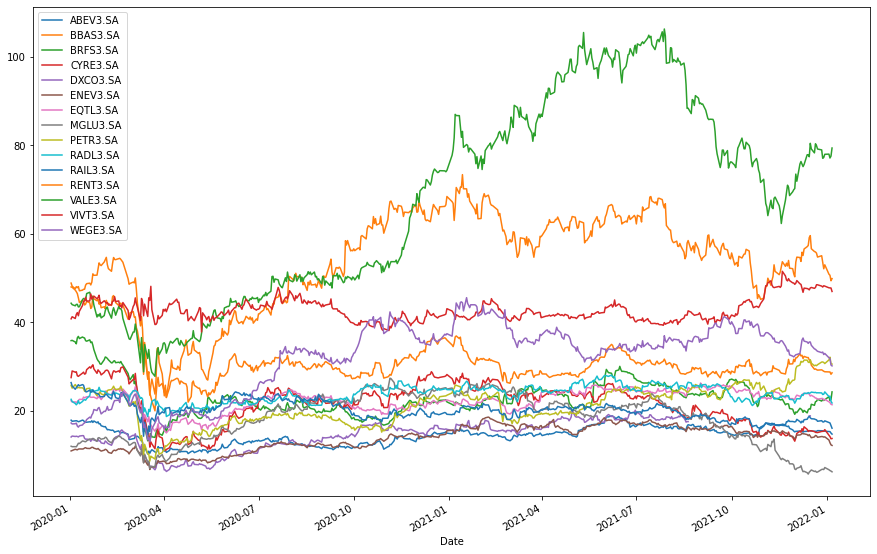

In [6]:
preços[preços.index >= "2020-01-01"].plot(figsize=(15,10));

## Passo 2: Estimando os retornos esperados e a matriz de covariância


In [7]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [8]:
# Retorno Esperado - calculado pelo CAPM - Ri=Rf+βi(E(Rm)−Rf)
from pypfopt import expected_returns

retornoEsperado = expected_returns.capm_return(preços)
retornoEsperado

ABEV3.SA    0.156809
BBAS3.SA    0.291353
BRFS3.SA    0.206886
CYRE3.SA    0.308007
DXCO3.SA    0.285369
ENEV3.SA    0.260402
EQTL3.SA    0.197483
MGLU3.SA    0.348168
PETR3.SA    0.290792
RADL3.SA    0.506280
RAIL3.SA    0.363332
RENT3.SA    0.296862
VALE3.SA    0.242034
VIVT3.SA    0.149260
WEGE3.SA    0.162843
Name: mkt, dtype: float64

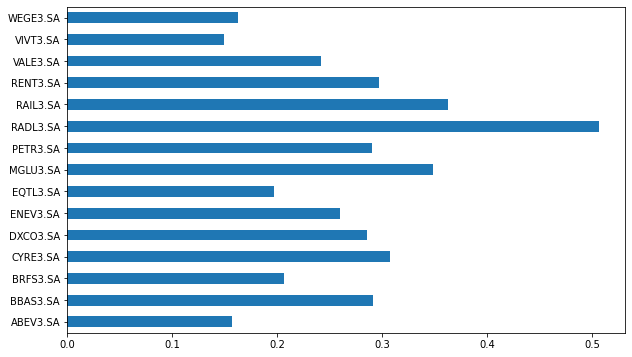

In [9]:
retornoEsperado.plot.barh(figsize=(10,6));

## Estimando a matriz de covariância

In [10]:
# Esta é a matriz de covariância
from pypfopt import risk_models
from pypfopt import plotting

matrizCov = risk_models.sample_cov(preços, frequency=252)
matrizCov

,ABEV3.SA,BBAS3.SA,BRFS3.SA,CYRE3.SA,DXCO3.SA,ENEV3.SA,EQTL3.SA,MGLU3.SA,PETR3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
ABEV3.SA,0.089265,0.039056,0.024012,0.037149,0.036794,0.027001,0.023922,0.034608,0.039903,0.017959,0.044042,0.040482,0.033835,0.022628,0.021073
BBAS3.SA,0.039056,0.189917,0.044768,0.088175,0.081618,0.046561,0.050204,0.087176,0.096426,0.034508,0.104630,0.085462,0.067409,0.039910,0.033918
BRFS3.SA,0.024012,0.044768,0.177304,0.043168,0.043065,0.030445,0.025439,0.048314,0.042792,0.039190,0.055192,0.049057,0.037626,0.017918,0.025535
CYRE3.SA,0.037149,0.088175,0.043168,0.256257,0.090877,0.055915,0.055415,0.094708,0.076196,0.036577,0.102999,0.099940,0.061604,0.025876,0.041166
DXCO3.SA,0.036794,0.081618,0.043065,0.090877,0.188688,0.045475,0.038155,0.077750,0.080289,0.032017,0.079286,0.077347,0.059901,0.028348,0.044912
ENEV3.SA,0.027001,0.046561,0.030445,0.055915,0.045475,0.302635,0.033661,0.050040,0.056189,0.031147,0.054837,0.048624,0.050124,0.023133,0.035454
EQTL3.SA,0.023922,0.050204,0.025439,0.055415,0.038155,0.033661,0.143819,0.039681,0.045842,0.026244,0.052404,0.046518,0.032475,0.019836,0.028880
MGLU3.SA,0.034608,0.087176,0.048314,0.094708,0.077750,0.050040,0.039681,0.354322,0.083353,0.039676,0.122674,0.075812,0.064356,0.034361,0.049557
PETR3.SA,0.039903,0.096426,0.042792,0.076196,0.080289,0.056189,0.045842,0.083353,0.191741,0.039331,0.096942,0.077033,0.094112,0.037391,0.035750
RADL3.SA,0.017959,0.034508,0.039190,0.036577,0.032017,0.031147,0.026244,0.039676,0.039331,0.883125,0.041234,0.040479,0.020584,0.019646,0.021549


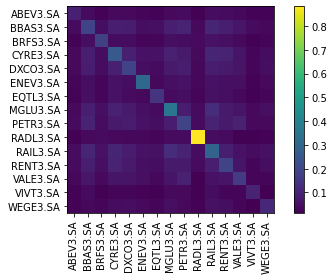

In [11]:
plotting.plot_covariance(matrizCov, plot_correlation=False);

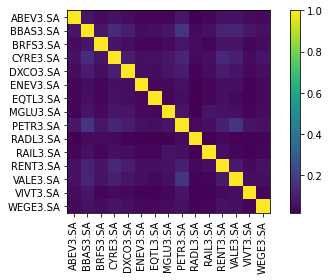

In [12]:
Estimativa_reducao = risk_models.CovarianceShrinkage(preços).ledoit_wolf()
plotting.plot_covariance(Estimativa_reducao, plot_correlation=True);

In [17]:
Estimativa_reducao

,ABEV3.SA,BBAS3.SA,BRFS3.SA,CYRE3.SA,DXCO3.SA,ENEV3.SA,EQTL3.SA,MGLU3.SA,PETR3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
ABEV3.SA,0.161886,0.012993,0.007988,0.012340,0.007851,0.005680,0.004917,0.005511,0.013275,0.005975,0.004448,0.010082,0.011256,0.007528,0.007011
BBAS3.SA,0.012993,0.195391,0.014898,0.029290,0.017427,0.009794,0.010326,0.013925,0.032088,0.011478,0.010596,0.021298,0.022432,0.013281,0.011287
BRFS3.SA,0.007988,0.014898,0.191194,0.014338,0.009196,0.006404,0.005231,0.007708,0.014240,0.013036,0.005577,0.012235,0.012521,0.005963,0.008498
CYRE3.SA,0.012340,0.029290,0.014338,0.217313,0.019394,0.011764,0.011385,0.015106,0.025312,0.012150,0.010425,0.024925,0.020460,0.008590,0.013676
DXCO3.SA,0.007851,0.017427,0.009196,0.019394,0.172514,0.009560,0.007865,0.012451,0.017146,0.006804,0.008041,0.016529,0.012786,0.006053,0.009587
ENEV3.SA,0.005680,0.009794,0.006404,0.011764,0.009560,0.195829,0.006929,0.007995,0.011818,0.006559,0.005583,0.010224,0.010543,0.004865,0.007458
EQTL3.SA,0.004917,0.010326,0.005231,0.011385,0.007865,0.006929,0.161808,0.006393,0.009426,0.005369,0.005319,0.009580,0.006673,0.004084,0.005938
MGLU3.SA,0.005511,0.013925,0.007708,0.015106,0.012451,0.007995,0.006393,0.188937,0.013324,0.006271,0.012468,0.012135,0.010278,0.005499,0.007926
PETR3.SA,0.013275,0.032088,0.014240,0.025312,0.017146,0.011818,0.009426,0.013324,0.195998,0.013083,0.009830,0.019200,0.031318,0.012443,0.011897
RADL3.SA,0.005975,0.011478,0.013036,0.012150,0.006804,0.006559,0.005369,0.006271,0.013083,0.425915,0.004155,0.010058,0.006847,0.006534,0.007171


## Passo 3: Portfólio que maximiza o índice de Sharpe

In [13]:
# Pesos de cada Ativo - para maximizar o Índice de Sharpe
from pypfopt import EfficientFrontier

ef = EfficientFrontier (retornoEsperado,Estimativa_reducao)
pesos = ef.max_sharpe() 

cleaned_pesos = ef.clean_weights()
ef.save_weights_to_file("pesos.txt")  # saves to file
cleaned_pesos

OrderedDict([('ABEV3.SA', 0.03274),
             ('BBAS3.SA', 0.05272),
             ('BRFS3.SA', 0.04348),
             ('CYRE3.SA', 0.05351),
             ('DXCO3.SA', 0.08266),
             ('ENEV3.SA', 0.07565),
             ('EQTL3.SA', 0.06086),
             ('MGLU3.SA', 0.11269),
             ('PETR3.SA', 0.05186),
             ('RADL3.SA', 0.08947),
             ('RAIL3.SA', 0.15688),
             ('RENT3.SA', 0.07568),
             ('VALE3.SA', 0.04806),
             ('VIVT3.SA', 0.03377),
             ('WEGE3.SA', 0.02998)])

## O desempenho esperado desse portfólio é:

In [14]:
ef.portfolio_performance(verbose=True)

Expected annual return: 30.2%
Annual volatility: 16.2%
Sharpe Ratio: 1.74


(0.3019088188513521, 0.16164340164391505, 1.7440168666604174)

## Passo 4: Gráfico da Fronteira Eficiente e Ponto ótimo

In [15]:
from pypfopt import CLA, plotting

cla = CLA(retornoEsperado,Estimativa_reducao)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 29.8%
Annual volatility: 16.0%
Sharpe Ratio: 1.74


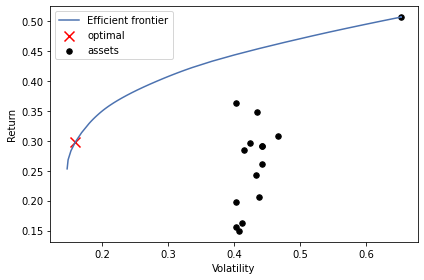

In [16]:
ax = plotting.plot_efficient_frontier(cla, showfig=True)